# Seaborn - CatPlot, CountPlot

막대 그래프 중에서 빈도 그래프 그리는 기능에 최적화 된 `catplot()` 메서드와 `countplot()` 메서드의 사용방법 확인

## #01. 준비작업

### [1] 패키치 참조

In [1]:
import sys
import seaborn as sb
from pandas import read_excel
from matplotlib import pyplot as plt

### [2] 그래프 초기화

In [2]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

### [3] 데이터 가져오기

#### 타이타닉 탑승객 데이터

> 출처: https://www.kaggle.com/competitions/titanic

| 변수명 | 설명 |
|---|---|
| PassengerId | 탑승객의 ID(인덱스와 같은 개념) |
| Survived | 생존유무(0은 사망 1은 생존) |
| Pclass | 객실의 등급 |
| Name | 이름 |
| Sex |성별 |
| SibSp | 동승한 형제 혹은 배우자의 수 |
| Parch | 동승한 자녀 혹은 부모의 수 |
| Ticket | 티켓번호 |
| Fare | 요금 |
| Cabin | 선실 |
| Embarked | 탑승지 (C = Cherbourg, Q = Queenstown, S = Southampton) |

In [3]:
origin = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/수업data/titanic.xlsx')
origin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### [4] 데이터 전처리

#### (1) 범주형 데이터 처리

##### 각 요인별 데이터 타입 확인

In [4]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### 범주형 데이터 타입 변환

In [5]:
df = origin.astype({'Survived':'category','Pclass':'category','Sex':'category','Cabin':'category','Embarked':'category'})
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin          category
Embarked       category
dtype: object

## #02. CatPlot (빈도 막대 그래프)

`catplot()`은 기본적으로 범주형 변수에 대한 그래프를 그리는 데 사용되지만, 다양한 플롯 유형을 지원한다.

### [1] 기본 사용 방법

`x`축으로 집단을 구분할 수 있는 범주형 변수를 설정하고 `kind='count'` 파라미터를 설정한다.

`catplot()` 함수의 결과물은 그래프의 크기가 `rcParams` 속성의 영향을 받지 않는다.

크기 설정을 위해서는 `catplot()` 메서드로부터 객체를 리턴받아 사이즈 설정을 개별적으로 수행해야 한다.

C:\Users\Jihwan\AppData\Local\Temp\ipykernel_13504\3846478019.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sb.catplot(data=df,x='Pclass', kind='count', palette='pastel',edgecolor='0.5')


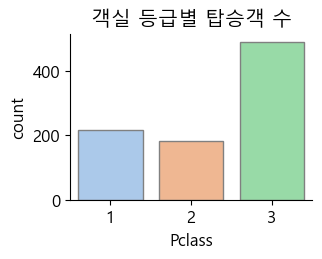

In [6]:
g = sb.catplot(data=df,x='Pclass', kind='count', palette='pastel',edgecolor='0.5')
g.fig.set_figwidth(3)
g.fig.set_figheight(2)

plt.title('객실 등급별 탑승객 수')
plt.show()
plt.close()


### [2] 범례 기준 추가

각 막대를 구분할 수 있는 범주형 변수를 `hue` 파라미터로 추가

`kind` : 그래프의 종류는 범주형 축 수준 플로팅 함수의 이름 (그래프 형태에 관여)

- "strip", "swarm", "box", "violin", "boxen", "point", "bar" 또는 "count"

#### 객실 등급에 따른 성별 빈도

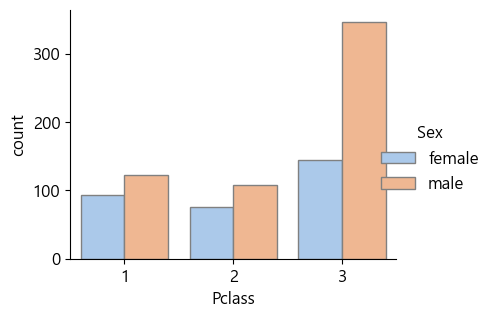

In [7]:
g = sb.catplot(data=df,
               x='Pclass', 
               kind='count', 
               palette='pastel',
               edgecolor='0.5',
               hue='Sex')
g.fig.set_figwidth(5)
g.fig.set_figheight(3)

plt.show()
plt.close()


### [3] 병렬 빈도 막대 그래프

이미 범주가 주어진 상황에서 추가적인 범주를 표현하고자 할 때 그래프를 두 개로 분리

병렬 막대그래프는 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스(canvas)에 병렬로 나열한 그래프

Seaborn으로 병렬 빈도 막대그래프를 그리려면 `catplot()` 메서드에 `kind='count'` 와 `col` 옵션을 추가한다.

#### 객실 등급에 따른 생존 여부를 두 개의 그래프로 분리

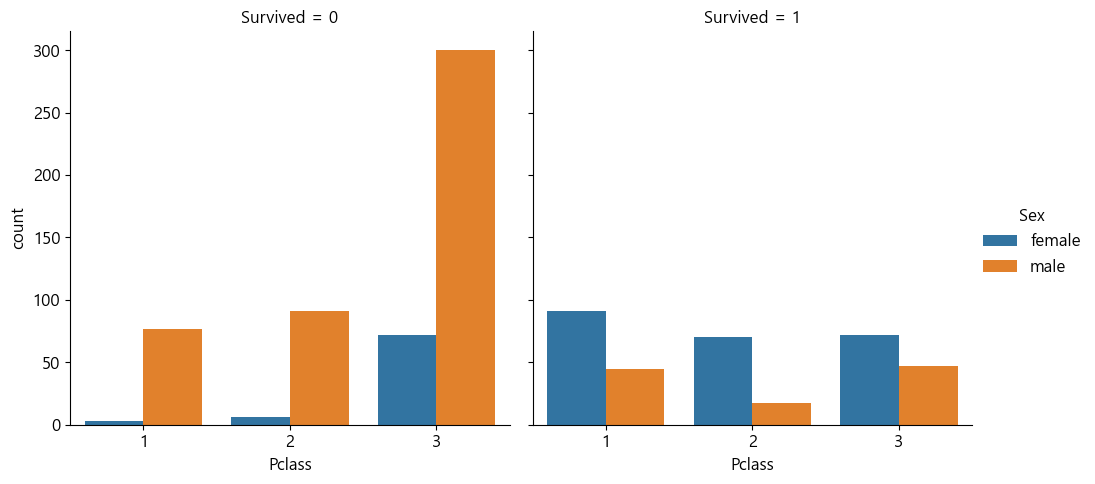

In [8]:
g = sb.catplot(data=df,
               x='Pclass', 
               kind='count', 
               col='Survived',
               hue='Sex')

plt.show()
plt.close()


### [4] 가로 빈도 막대 그래프

`x` 파라미터 대신 `y` 파라미터를 사용한다.

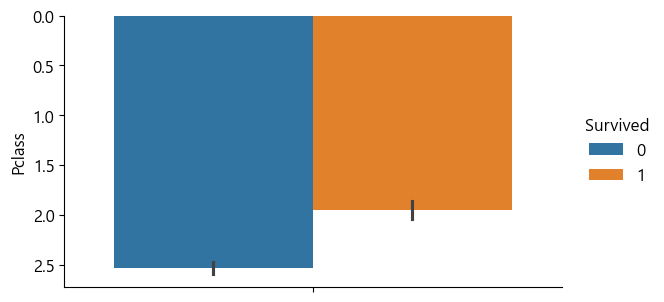

In [15]:
g = sb.catplot(data=df,
               y='Pclass', 
               kind='bar', 
               hue='Survived')
g.fig.set_figwidth(7)
g.fig.set_figheight(3)

plt.show()
plt.close()


## #03. CountPlot

데이터의 빈도를 표현하는 가장 간편한 방법

`catplot()`에서 `kind`값이 `count`로 고정되어 있는 형태

### [1] 기본 사용 방법

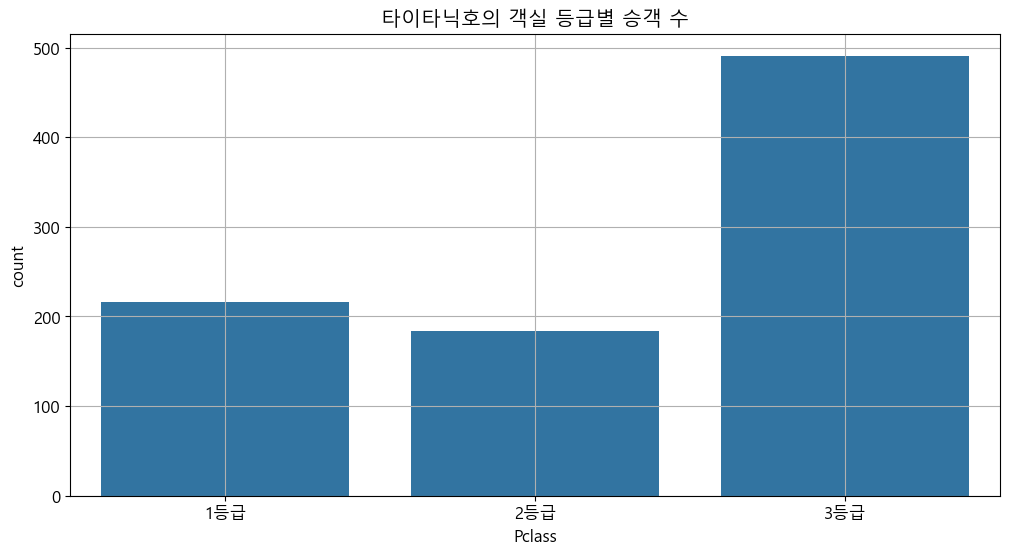

In [10]:
plt.figure()
sb.countplot(data=df,x='Pclass')
plt.title('타이타닉호의 객실 등급별 승객 수')
plt.xticks([0,1,2],['1등급','2등급','3등급'])
plt.grid()
plt.show()
plt.close()

### [2] 범주 추가

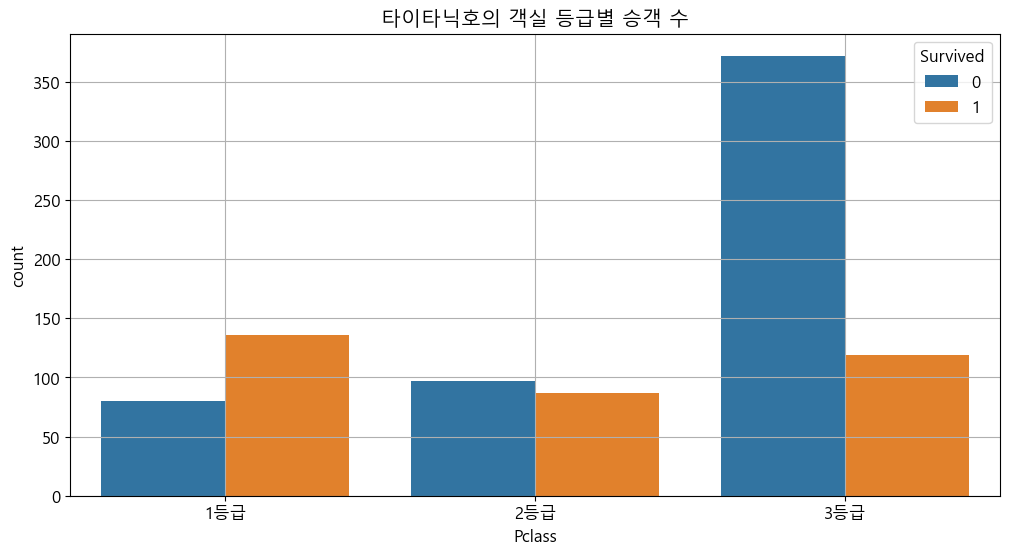

In [11]:
plt.figure()
sb.countplot(data=df,x='Pclass',hue='Survived')
plt.title('타이타닉호의 객실 등급별 승객 수')
plt.xticks([0,1,2],['1등급','2등급','3등급'])
plt.grid()
plt.show()
plt.close()
